In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Byte Degree/marketing/data")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/Byte Degree/marketing/data'

# Data Preprocessing & Exploratory Data Analysis

In [ ]:
import pandas as pd
custom = pd.read_csv('Customer.csv')
trans = pd.read_csv('Transactions.csv')
prod = pd.read_csv('prod_cat_info.csv')

In [ ]:
custom.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
# 2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별(gender), 연령 구간별로 고객 수 집계

In [ ]:
from datetime import datetime

# 날짜 형식을 분석하여 변환하는 함수 정의
def convert_date(trans):
    try:
        # '-'로 구분된 형식을 먼저 시도
        date_object = pd.to_datetime(trans, format='%d-%m-%Y')
    except ValueError:
        try:
            # '/'로 구분된 형식을 시도
            date_object = pd.to_datetime(trans, format='%d/%m/%Y')
        except ValueError:
            # 날짜 형식이 알려진 형식과 맞지 않을 경우 NaN 반환
            date_object = pd.NaT
    return date_object

# 데이터프레임의 날짜 변수를 변환
trans['tran_date'] = trans['tran_date'].apply(convert_date)

# 결과 출력
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
from datetime import datetime

# 날짜 형식을 분석하여 변환하는 함수 정의
def convert_date(custom):
    try:
        # '-'로 구분된 형식을 먼저 시도
        date_object = pd.to_datetime(custom, format='%d-%m-%Y')
    except ValueError:
        try:
            # '/'로 구분된 형식을 시도
            date_object = pd.to_datetime(custom, format='%d/%m/%Y')
        except ValueError:
            # 날짜 형식이 알려진 형식과 맞지 않을 경우 NaN 반환
            date_object = pd.NaT
    return date_object

# 데이터프레임의 날짜 변수를 변환
custom['DOB'] = custom['DOB'].apply(convert_date)

# 결과 출력
custom.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [ ]:
from datetime import datetime

# 생년월일을 datetime 형식으로 변환
custom['DOB'] = pd.to_datetime(custom['DOB'])

# 2011년 시점을 기준으로 연령 계산
custom['age'] = 2011 - custom['DOB'].dt.year

# 5세 단위로 연령 구간을 나누기 위한 구간 정의
bins = list(range(0, custom['age'].max() + 6, 5))

# 각 개체를 해당하는 구간에 할당
custom['age'] = pd.cut(custom['age'], bins, right=False)

# 결과 출력
custom.head()

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,"[40, 45)"
1,269696,1970-01-07,F,8.0,"[40, 45)"
2,268159,1970-01-08,F,8.0,"[40, 45)"
3,270181,1970-01-10,F,2.0,"[40, 45)"
4,268073,1970-01-11,M,1.0,"[40, 45)"


In [ ]:
# 성별과 연령대로 그룹화하여 고객 수 집계
result_g = custom.groupby(['Gender']).size().reset_index(name='number')

# 결과 출력
result_g.head()

,Gender,number
0,F,2753
1,M,2892


In [ ]:
# 성별과 연령대로 그룹화하여 고객 수 집계
result_a = custom.groupby(['age']).size().reset_index(name='number')

# 결과 출력
result_a.tail(6)

,age,number
3,"[15, 20)",261
4,"[20, 25)",1251
5,"[25, 30)",1198
6,"[30, 35)",1240
7,"[35, 40)",1222
8,"[40, 45)",475


In [ ]:
# 연령대 데이터를 중심값으로 변환
custom['age'] = custom['age'].apply(lambda x: int(x.left) + 5)

# 성별과 연령대로 그룹화하여 고객 수 집계
result = custom.groupby(['Gender', 'age']).size().reset_index(name='number')

# 결과 출력
print(result)

   Gender age  number
0       F   5       0
1       F  10       0
2       F  15       0
3       F  20     141
4       F  25     614
5       F  30     592
6       F  35     578
7       F  40     596
8       F  45     232
9       M   5       0
10      M  10       0
11      M  15       0
12      M  20     120
13      M  25     637
14      M  30     606
15      M  35     662
16      M  40     626
17      M  45     241


In [ ]:
# 위에서 집계한 데이터를 기준으로 연령/성별 통계를 확인할 수 있는 데이터 시각화

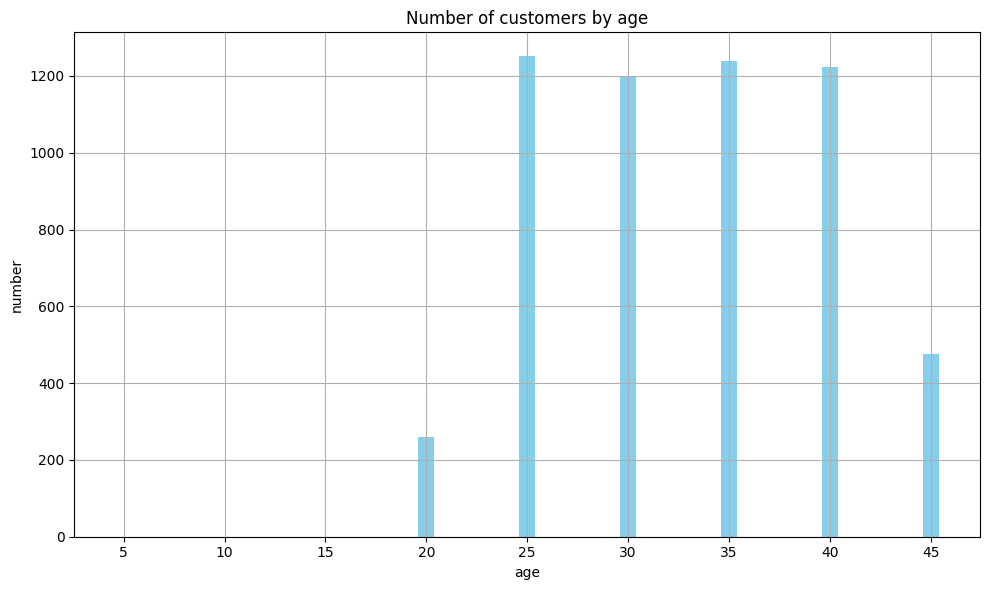

In [ ]:
import matplotlib.pyplot as plt

# 연령대별로 그룹화하여 고객 수 집계
result_age = custom.groupby('age').size().reset_index(name='number')

# 연령대별 고객 수 시각화
plt.figure(figsize=(10, 6))
plt.bar(result_age['age'], result_age['number'], color='skyblue')
plt.xlabel('age')
plt.ylabel('number')
plt.title('Number of customers by age')
plt.grid(True)
plt.tight_layout()
plt.show()

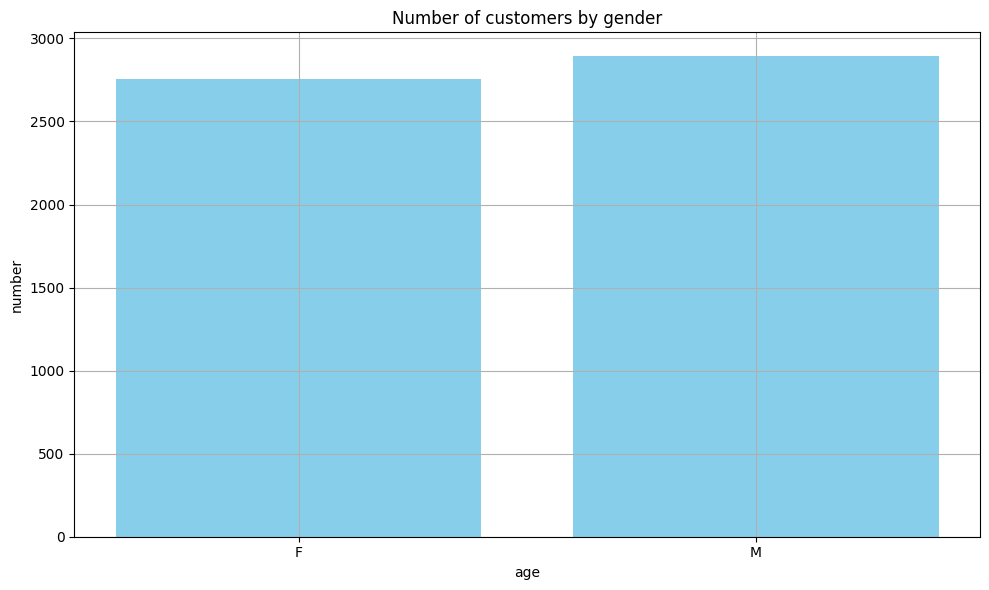

In [ ]:
# 연령대별로 그룹화하여 고객 수 집계
result_gender = custom.groupby('Gender').size().reset_index(name='number')

# 연령대별 고객 수 시각화
plt.figure(figsize=(10, 6))
plt.bar(result_gender['Gender'], result_gender['number'], color='skyblue')
plt.xlabel('age')
plt.ylabel('number')
plt.title('Number of customers by gender')
plt.grid(True)
plt.tight_layout()
plt.show()

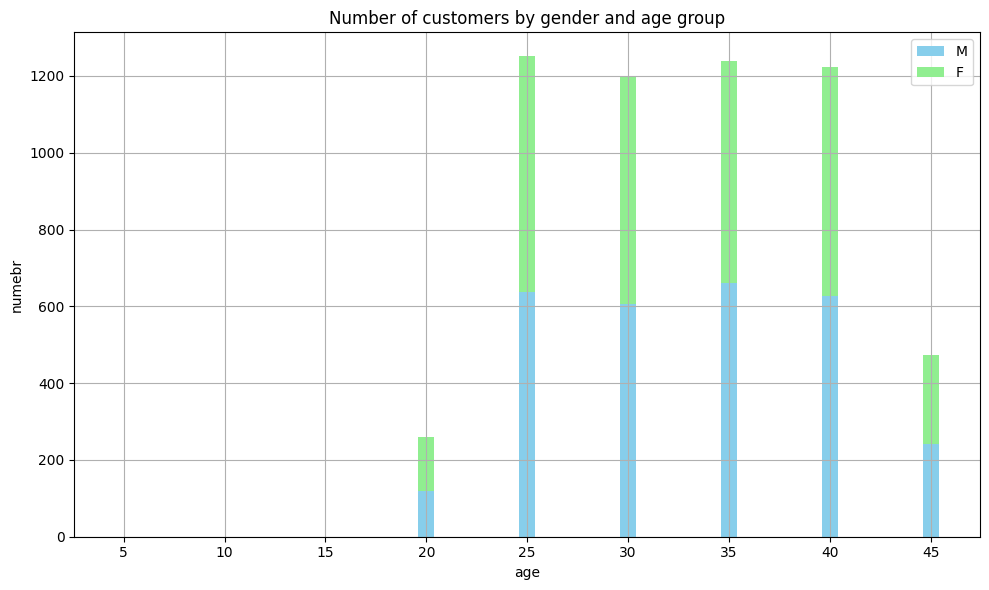

In [ ]:
# 연령대 및 성별로 그룹화하여 고객 수 집계
result = custom.groupby(['age', 'Gender']).size().unstack()

# 그래프 시각화
plt.figure(figsize=(10, 6))

# 남성 고객 수 그래프
plt.bar(result.index, result['M'], label='M', color='skyblue')

# 여성 고객 수 그래프
plt.bar(result.index, result['F'], bottom=result['M'], label='F', color='lightgreen')

plt.xlabel('age')
plt.ylabel('numebr')
plt.title('Number of customers by gender and age group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기
# - 구매 경과일수 = 기준일 - 마지막 구매일
# - 구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)

In [ ]:
# 구매일자를 datetime 형식으로 변환
trans['tran_date'] = pd.to_datetime(trans['tran_date'])

# 기준일 설정 (2013년 2월 28일)
기준일 = datetime(2013, 2, 28)

# 구매 경과일수 및 구매주기 계산 함수 정의
def calculate_purchase_metrics(purchase_dates, 기준일):
    마지막_구매일 = purchase_dates.max()
    첫_구매일 = purchase_dates.min()
    총_구매_일수 = (마지막_구매일 - 첫_구매일).days + 1
    구매_경과일수 = (기준일 - 마지막_구매일).days
    if 총_구매_일수 == 1:
        구매_주기 = None
    else:
        구매_주기 = (마지막_구매일 - 첫_구매일).days / (총_구매_일수 - 1)
    return 구매_경과일수, 구매_주기

# 고객별로 구매 경과일수 및 구매주기 계산하여 새로운 데이터프레임에 저장
purchase_metrics = trans.groupby('cust_id')['tran_date'].apply(lambda x: calculate_purchase_metrics(x, 기준일)).apply(pd.Series)
purchase_metrics.columns = ['구매경과일수', '구매주기']

# 결과 출력
purchase_metrics.head(10)

,구매경과일수,구매주기
cust_id,,
266783,8.0,1.0
266784,86.0,1.0
266785,-154.0,1.0
266788,16.0,1.0
266794,-349.0,1.0
266799,-319.0,1.0
266803,271.0,NaN
266804,-100.0,NaN
266805,-302.0,NaN


In [ ]:
custom

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,45
1,269696,1970-01-07,F,8.0,45
2,268159,1970-01-08,F,8.0,45
3,270181,1970-01-10,F,2.0,45
4,268073,1970-01-11,M,1.0,45
...,...,...,...,...,...
5642,274474,1992-12-19,M,2.0,20
5643,267666,1992-12-24,M,6.0,20
5644,270476,1992-12-25,F,3.0,20
5645,269626,1992-12-27,F,5.0,20


In [ ]:
# 위에서 구한 결과에 고객의 연령, 연령 구간, 성별 정보를 결합하여 특정 연령 구간, 성별 간 차이

In [ ]:
custom.rename(columns = {'customer_Id' : 'cust_id'}, inplace = True)
df = pd.merge(custom, purchase_metrics, on = "cust_id")
df

,cust_id,DOB,Gender,city_code,age,구매경과일수,구매주기
0,268408,1970-01-02,M,4.0,45,-319.0,1.0
1,269696,1970-01-07,F,8.0,45,319.0,1.0
2,268159,1970-01-08,F,8.0,45,-217.0,1.0
3,270181,1970-01-10,F,2.0,45,-322.0,1.0
4,268073,1970-01-11,M,1.0,45,-305.0,1.0
...,...,...,...,...,...,...,...
5501,274474,1992-12-19,M,2.0,20,547.0,1.0
5502,267666,1992-12-24,M,6.0,20,-313.0,1.0
5503,270476,1992-12-25,F,3.0,20,-166.0,1.0
5504,269626,1992-12-27,F,5.0,20,499.0,1.0


In [ ]:
df["구매주기"].unique()

array([ 1., nan])

In [ ]:
# 위에서 구한 고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행
# 캠페인 2013년 12월 31일까지 구매 반응한 고객 수

In [ ]:
# 2013년 12월 31일 이전에 구매한 고객 수 계산
구매전고객수 = trans[trans['tran_date'] <= '2013-12-31']['cust_id'].nunique()

print("2013년 12월 31일까지 구매한 고객 수:", 구매전고객수)

2013년 12월 31일까지 구매한 고객 수: 5473


In [ ]:
# 전체 데이터에서 고객의 요일별 구매 건수 차이

In [ ]:
# 요일 컬럼 생성
trans['day'] = trans['tran_date'].dt.day_name()

# 요일별 구매 건수 계산
요일별_구매건수 = trans['day'].value_counts().reset_index()
요일별_구매건수.columns = ['day', 'tran_date']

# 고객의 요일별 구매 건수 차이 계산
고객의_요일별_구매건수_차이 = trans.groupby(['cust_id', 'day']).size().unstack(fill_value=0)
고객의_요일별_구매건수_차이['최대_최소_구매건수_차이'] = 고객의_요일별_구매건수_차이.max(axis=1) - 고객의_요일별_구매건수_차이.min(axis=1)

# 결과 출력
print("요일별 구매 건수:\n", 요일별_구매건수)
print("\n고객의 요일별 구매 건수 차이:\n", 고객의_요일별_구매건수_차이)

요일별 구매 건수:
          day  tran_date
0     Friday       3361
1     Sunday       3326
2   Thursday       3318
3  Wednesday       3302
4    Tuesday       3269
5   Saturday       3258
6     Monday       3219

고객의 요일별 구매 건수 차이:
 day      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
cust_id                                                                   
266783        1       0         2       1         0        0          1   
266784        0       0         0       1         1        1          0   
266785        0       1         1       1         1        1          3   
266788        0       0         0       1         0        2          1   
266794        4       1         1       1         1        2          2   
...         ...     ...       ...     ...       ...      ...        ...   
275257        0       2         0       0         1        2          0   
275261        1       1         1       0         1        0          1   
275262        0       0   

In [ ]:
# 대 카테고리를 기준으로 2011년부터 2013년 월평균 매출액이 가장 높은 카테고리

In [ ]:
trans = pd.merge(trans, prod, on = "prod_cat_code")

# 구매일자를 연도와 월로 변환하여 새로운 컬럼 생성
trans['year'] = trans['tran_date'].dt.year
trans['month'] = trans['tran_date'].dt.month

# 2011년부터 2013년까지의 데이터만 필터링
filtered_df = trans[(trans['year'] >= 2011) & (trans['year'] <= 2013)]

# 월평균 매출액 계산
월평균매출액 = filtered_df.groupby(['prod_cat_code', 'month'])['total_amt'].sum().groupby('prod_cat_code').mean()

# 월평균 매출액이 가장 높은 대 카테고리 찾기
가장높은매출대카테고리 = 월평균매출액.idxmax()

print("2011년부터 2013년까지의 월평균 매출액이 가장 높은 대 카테고리:", 가장높은매출대카테고리)
# Books!!

2011년부터 2013년까지의 월평균 매출액이 가장 높은 대 카테고리: 5


In [ ]:
# 각 카테고리별 월평균 매출액의 분산과 표준 편차

In [ ]:
# 각 카테고리별로 월평균 매출액 계산
월평균매출액 = trans.groupby(['prod_cat_code', 'year', 'month'])['total_amt'].sum().groupby('prod_cat_code').mean()

# 각 카테고리별로 월평균 매출액의 분산과 표준 편차 계산
월평균매출액_분산 = trans.groupby('prod_cat_code')['total_amt'].var()
월평균매출액_표준편차 = trans.groupby('prod_cat_code')['total_amt'].std()

# 소수점 형태로 출력하기 위한 설정
pd.options.display.float_format = '{:.2f}'.format

# 결과 출력
print("월평균 매출액:\n", 월평균매출액)
print("월평균 매출액의 분산:\n", 월평균매출액_분산)
print("\n월평균 매출액의 표준 편차:\n", 월평균매출액_표준편차)

월평균 매출액:
 prod_cat_code
1    493510.85
2    491034.81
3   1410850.48
4    217089.93
5   2024635.90
6    888315.08
Name: total_amt, dtype: float64
월평균 매출액의 분산:
 prod_cat_code
1   6754668.63
2   6106439.83
3   6214484.08
4   6585805.62
5   6268753.79
6   6043454.59
Name: total_amt, dtype: float64

월평균 매출액의 표준 편차:
 prod_cat_code
1   2598.97
2   2471.12
3   2492.89
4   2566.28
5   2503.75
6   2458.34
Name: total_amt, dtype: float64


In [ ]:
# 각 카테고리에 대한 월평균 매출액과 표준 편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단

In [ ]:
prod.head(20)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


월 평균 매출액은 카테고리별로 5, 3, 6 순으로 많다.(Books, Electronics, Home and kitchen)

표준편차는 약 2500 정도로 비슷하지만, 월 평균 매출액의 변동 계수를 보았을 때, 1, 2, 4 카테고리의 매출 변동이 더 심하다는 것을 알 수 있다.(Clothing, Footwear, Bags)

전체적으로 의류 카테고리에서 매출의 변동이 심한 것을 알 수 있다.

주제 1. 매출 관점에서 카테고리별 매출 성장 방안

위 결과에 따라, 카테고리별 매출 성장 방안에 대해 가설을 수립하고 데이터 탐색 후 비즈니스 문제를 정의해보기로 하였다.

문제 상황 : 의류 카테고리의 매출 변동이 심한 상태
솔루션 : 변동폭을 줄여 매출을 올리거나, 매출액이 높은 카테고리에 집중하는 등의 방안을 모색해볼 수 있다.

#  Interpretation & Hypothesising

In [ ]:
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Byte Degree/marketing/data/merge_trans_cust_prod.csv')
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [ ]:
# 컬럼 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            22933 non-null  int64  
 1   dob                22933 non-null  object 
 2   age                22933 non-null  int64  
 3   gender             22933 non-null  object 
 4   city_code          22933 non-null  float64
 5   order_status       22933 non-null  object 
 6   confirmed_yn       22933 non-null  float64
 7   transaction_id     22933 non-null  int64  
 8   tran_date          22933 non-null  object 
 9   prod_cat_code      22933 non-null  int64  
 10  prod_sub_cat_code  22933 non-null  int64  
 11  prod_cat           22933 non-null  object 
 12  prod_subcat        22933 non-null  object 
 13  qty                22933 non-null  int64  
 14  rate               22933 non-null  int64  
 15  tax                22933 non-null  float64
 16  total_amt          229

In [ ]:
# 각 컬럼의 통계치 확인
df.describe()

,cust_id,age,city_code,confirmed_yn,transaction_id,prod_cat_code,prod_sub_cat_code,qty,rate,tax,total_amt
count,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00,22933.00
mean,271022.21,31.08,5.48,0.82,50060819565.90,3.76,6.15,2.46,643.89,248.63,2132.44
std,2431.41,6.68,2.86,0.38,28982699294.30,1.68,3.73,2.24,614.48,187.09,2485.09
min,266783.00,19.00,1.00,0.00,3268991.00,1.00,1.00,-5.00,-1499.00,7.35,-8270.92
25%,268936.00,25.00,3.00,1.00,24883597022.00,2.00,3.00,1.00,318.00,98.28,777.92
50%,270980.00,31.00,5.00,1.00,50089103442.00,4.00,5.00,3.00,715.00,199.08,1773.53
75%,273115.00,37.00,8.00,1.00,75314996655.00,5.00,10.00,4.00,1111.00,365.40,3584.62
max,275265.00,44.00,10.00,1.00,99987549630.00,6.00,12.00,5.00,1500.00,787.50,8287.50


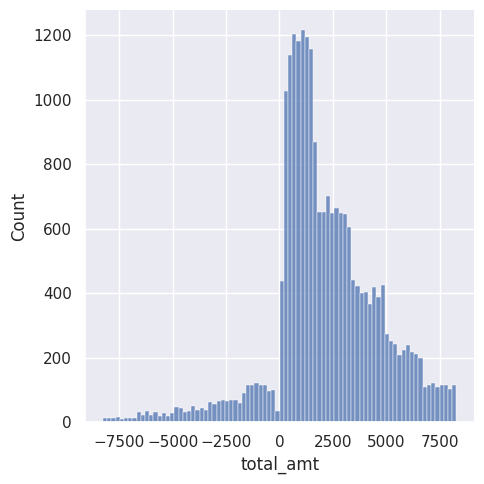

In [ ]:
sns.displot(df['total_amt'])

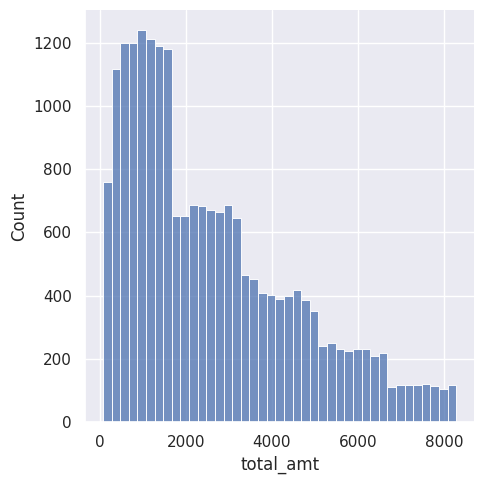

In [ ]:
## order_status가 'Ordered'인 값만 분포 확인
sns.displot(df['total_amt'][df['order_status'] == 'Ordered'])

In [ ]:
# 각 열의 최빈값 계산
mode_values = df.mode()

# 결과 출력
print("각 열의 최빈값:")
print(mode_values)

각 열의 최빈값:
       cust_id         dob   age gender  city_code order_status  confirmed_yn  \
0     268819.0  1982-09-17  24.0      M        4.0      Ordered           1.0   
1          NaN  1988-12-27   NaN    NaN        NaN          NaN           NaN   
2          NaN         NaN   NaN    NaN        NaN          NaN           NaN   
3          NaN         NaN   NaN    NaN        NaN          NaN           NaN   
4          NaN         NaN   NaN    NaN        NaN          NaN           NaN   
...        ...         ...   ...    ...        ...          ...           ...   
2052       NaN         NaN   NaN    NaN        NaN          NaN           NaN   
2053       NaN         NaN   NaN    NaN        NaN          NaN           NaN   
2054       NaN         NaN   NaN    NaN        NaN          NaN           NaN   
2055       NaN         NaN   NaN    NaN        NaN          NaN           NaN   
2056       NaN         NaN   NaN    NaN        NaN          NaN           NaN   

      transaction

In [ ]:
# 각 열의 값들을 카운트하고 내림차순으로 정렬
value_counts_sorted = df.apply(lambda x: x.value_counts().index[0]).to_frame().T

# 결과 출력
print("각 열의 값들의 빈도수 내림차순 정렬:")
print(value_counts_sorted)

각 열의 값들의 빈도수 내림차순 정렬:
  cust_id         dob age gender city_code order_status confirmed_yn  \
0  268819  1982-09-17  24      M       4.0      Ordered          1.0   

  transaction_id   tran_date prod_cat_code prod_sub_cat_code prod_cat  \
0    40678283758  2011-07-13             5                 4    Books   

  prod_subcat qty rate    tax total_amt store_type  
0       Women   5  672  64.26    676.26     e-Shop  


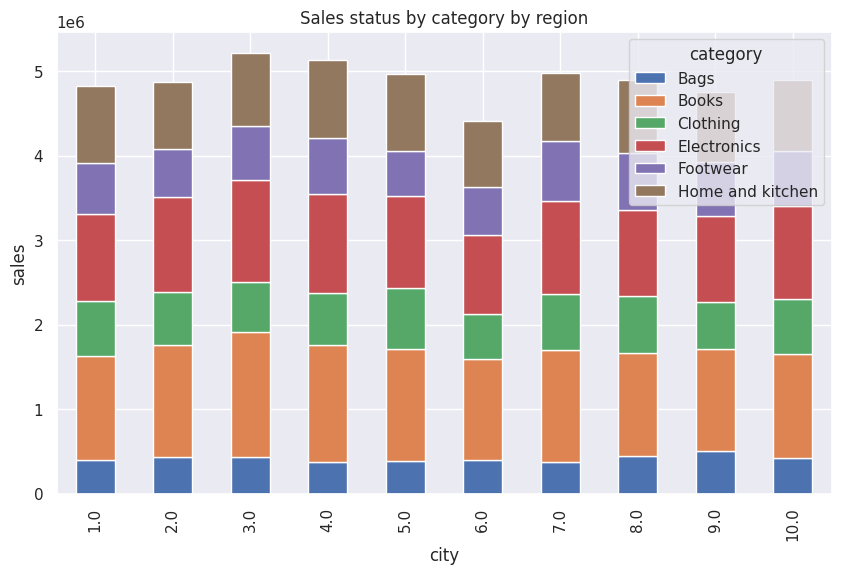

In [ ]:
# 지역과 카테고리에 따른 매출액 합계 계산
매출액_현황 = df.groupby(['city_code', 'prod_cat'])['total_amt'].sum().unstack()

# 시각화 그래프 설정
매출액_현황.plot(kind='bar', stacked=True, figsize=(10, 6))


# 그래프 제목 및 축 라벨 설정
plt.title('Sales status by category by region')
plt.xlabel('city')
plt.ylabel('sales')

# 범례 표시
plt.legend(title='category')

# 그래프 출력
plt.show()

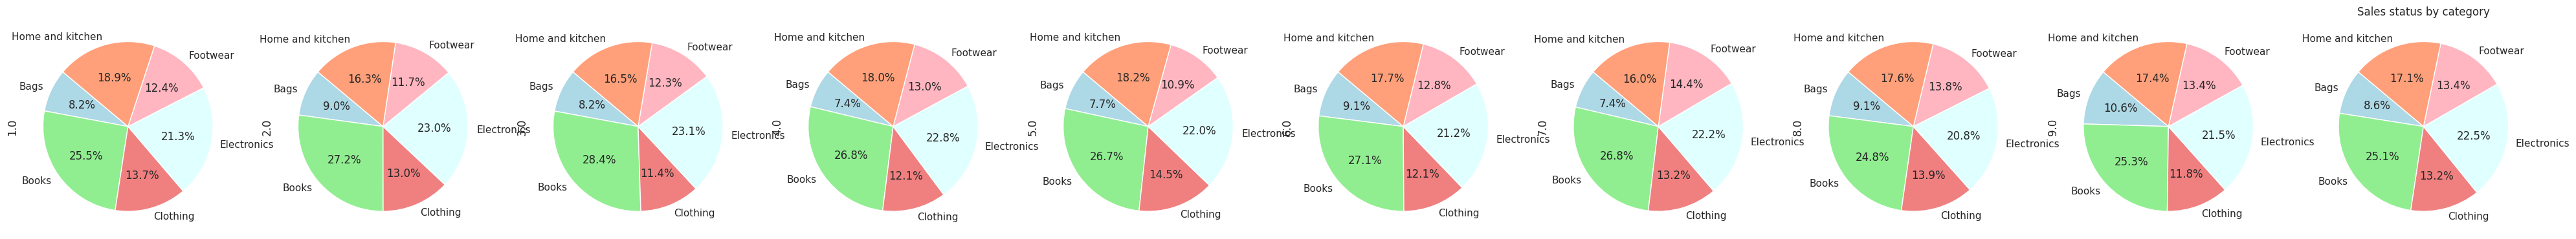

In [ ]:
# 지역과 카테고리별 매출액 합산
매출액_합계 = df.groupby(['city_code', 'prod_cat'])['total_amt'].sum().unstack()

# 파이 차트 생성
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcyan', 'lightpink', 'lightsalmon']
매출액_합계.T.plot.pie(subplots=True, figsize=(50, 15), autopct='%1.1f%%', colors=colors, startangle=140, legend=False)
plt.title('Sales status by category')
plt.ylabel('')  # y축 라벨 제거
plt.show()

지역적으로 카테고리마다 비슷한 비율을 보임

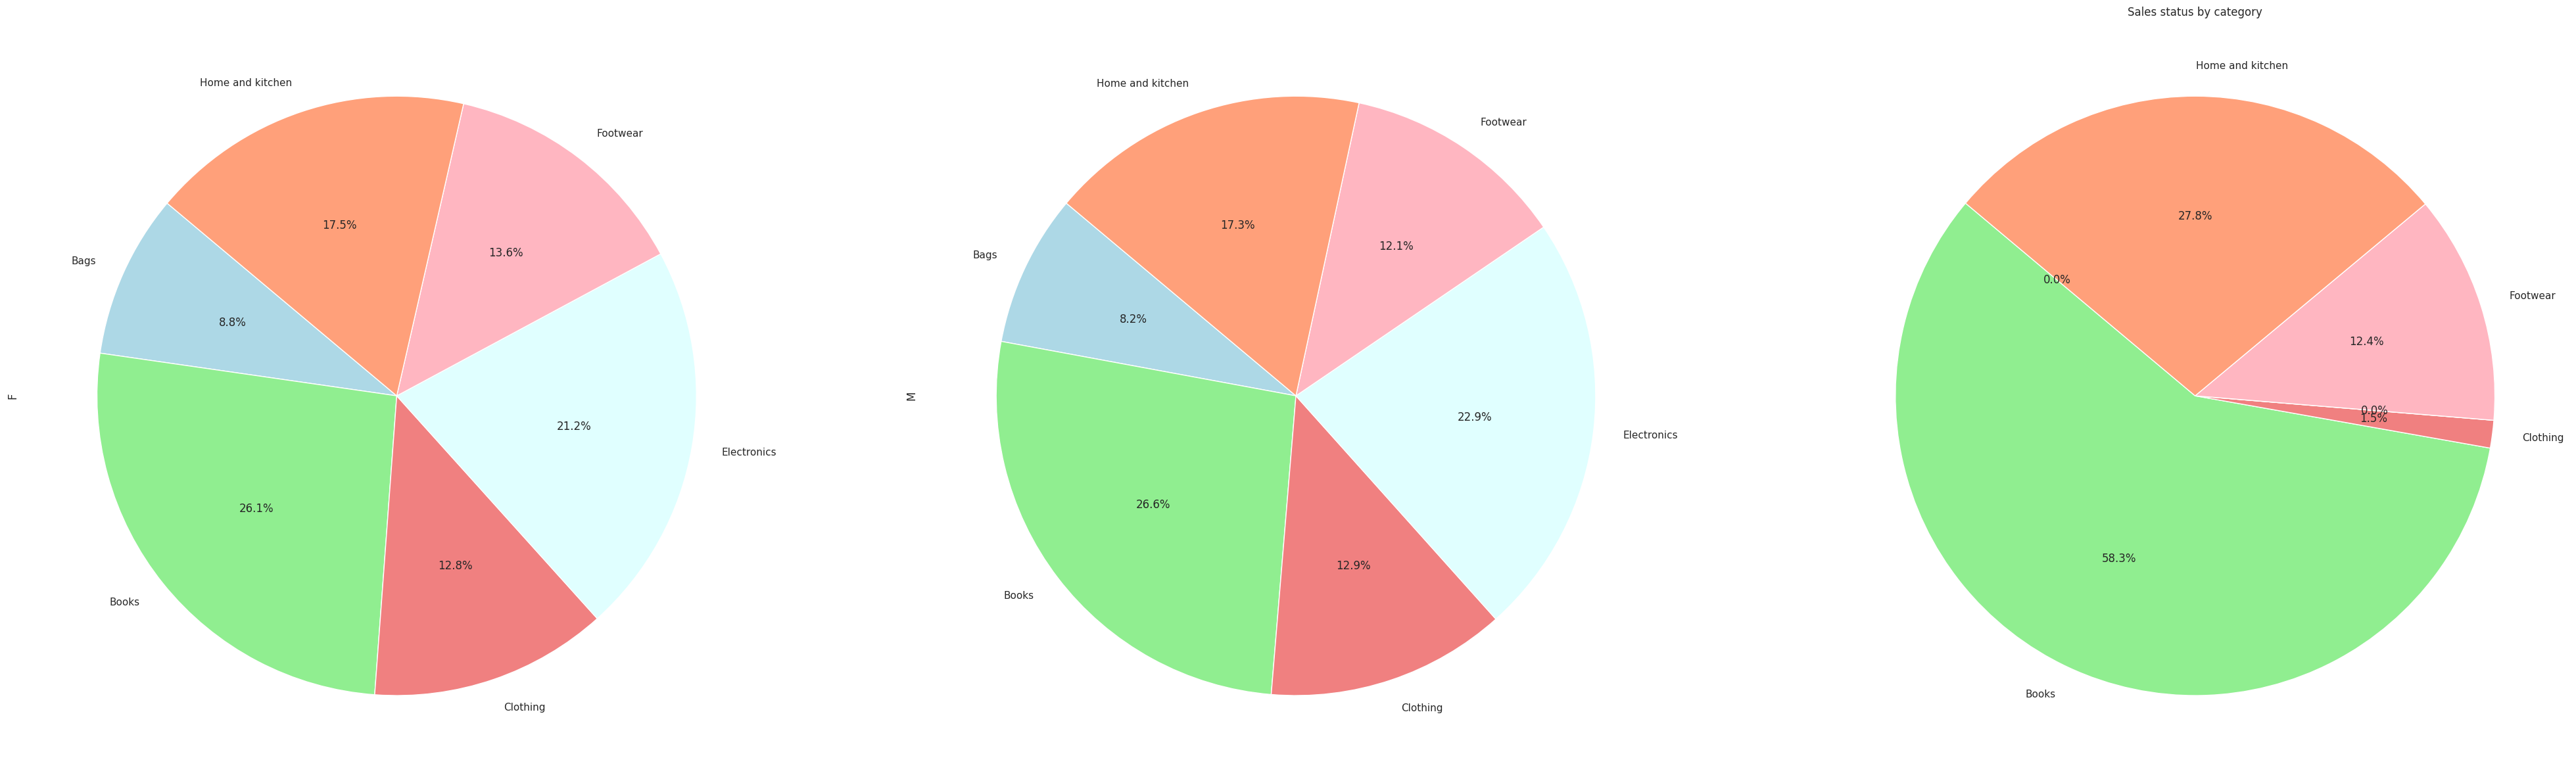

In [ ]:
# 지역과 카테고리별 매출액 합산
매출액_합계 = df.groupby(['gender', 'prod_cat'])['total_amt'].sum().unstack()

# 파이 차트 생성
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcyan', 'lightpink', 'lightsalmon']
매출액_합계.T.plot.pie(subplots=True, figsize=(50, 15), autopct='%1.1f%%', colors=colors, startangle=140, legend=False)
plt.title('Sales status by category')
plt.ylabel('')  # y축 라벨 제거
plt.show()

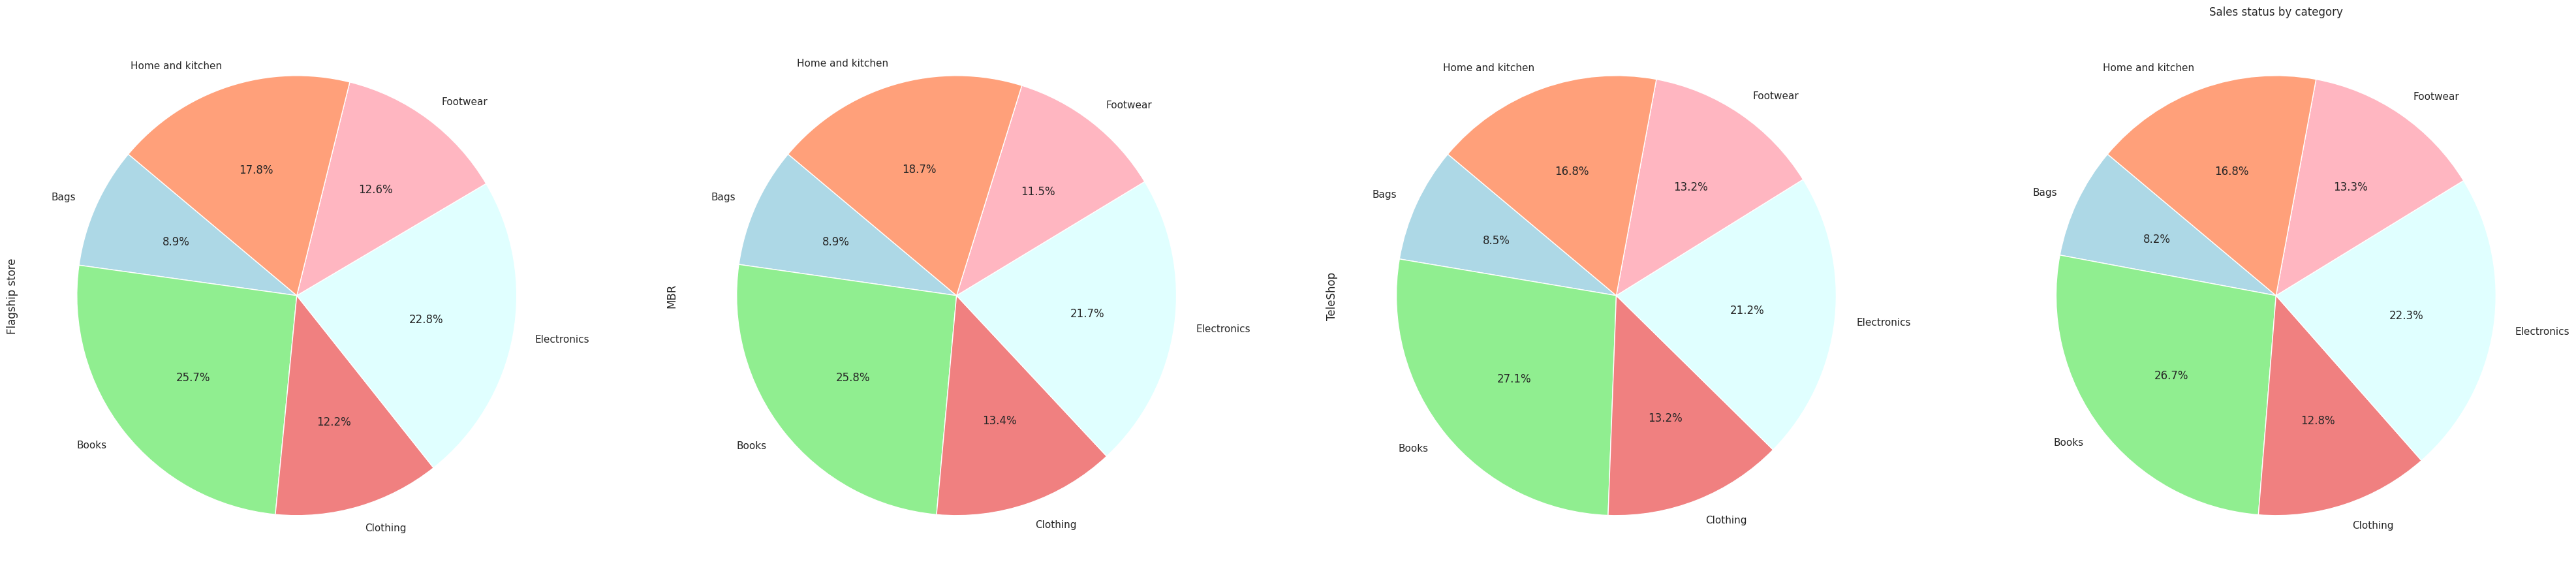

In [ ]:
# 지역과 카테고리별 매출액 합산
매출액_합계 = df.groupby(['store_type', 'prod_cat'])['total_amt'].sum().unstack()

# 파이 차트 생성
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcyan', 'lightpink', 'lightsalmon']
매출액_합계.T.plot.pie(subplots=True, figsize=(50, 15), autopct='%1.1f%%', colors=colors, startangle=140, legend=False)
plt.title('Sales status by category')
plt.ylabel('')  # y축 라벨 제거
plt.show()

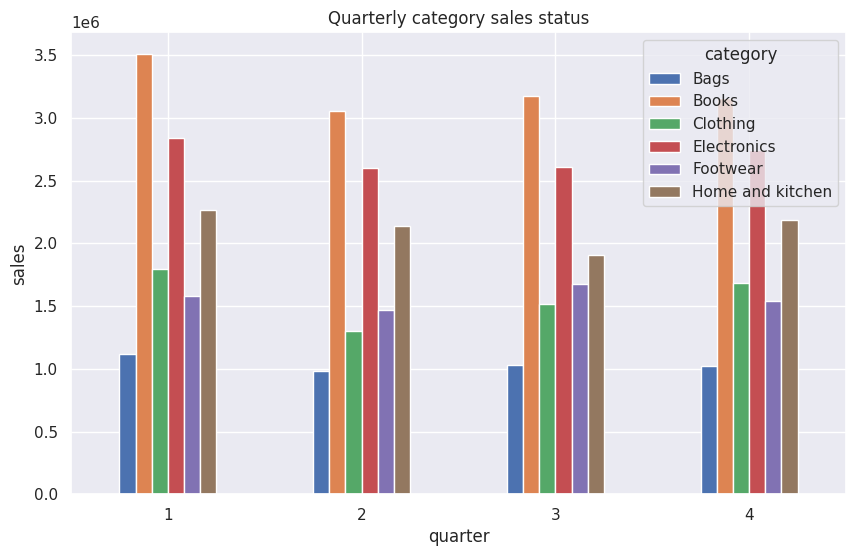

In [ ]:
# 구매일자를 datetime 형식으로 변환하고 분기 정보 생성
df['tran_date'] = pd.to_datetime(df['tran_date'])
df['quarter'] = df['tran_date'].dt.quarter

# 분기별 카테고리별 매출액 계산
분기별_매출액 = df.groupby(['quarter', 'prod_cat'])['total_amt'].sum().unstack()

# 막대 그래프 생성
분기별_매출액.plot(kind='bar', figsize=(10, 6))
plt.title('Quarterly category sales status')
plt.xlabel('quarter')
plt.ylabel('sales')
plt.xticks(rotation=0)
plt.legend(title='category')
plt.show()

전반적으로 1, 4분기의 매출액이 가장 높다.
Bags는 1분기, Clothing은 1분기, Footwear는 3분기에 매출액이 가장 높다.


계절에 알맞은 Clothing 카테고리 제품을 중점적으로 세일을 하는 것이 중요하다. 추가적으로, 옷을 사기 위해 방문할 때, 가방, 신발의 구매율도 함께 높일 수 있으므로 일정 금액 이상 시, 혜택을 부여하는 방안을 낼 수 있다.

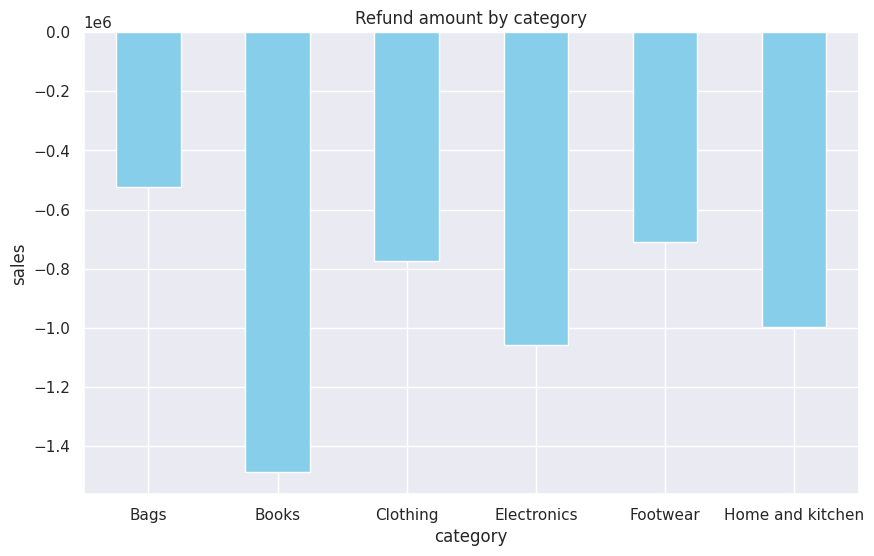

In [ ]:
# 매출액이 음수인 경우만을 포함하는 데이터프레임 생성
음수매출액_df = df[df['total_amt'] < 0]

# 음수매출액_df에서 카테고리별 매출액 합산
카테고리별_매출액 = 음수매출액_df.groupby('prod_cat')['total_amt'].sum()

# 막대 그래프 생성
카테고리별_매출액.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Refund amount by category')
plt.xlabel('category')
plt.ylabel('sales')
plt.xticks(rotation=0)
plt.show()

<ipython-input-31-1f9dc6d16798>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  음수매출액_df['total_amt'] = 음수매출액_df['total_amt'].abs()  # 음수값에 절대값 적용


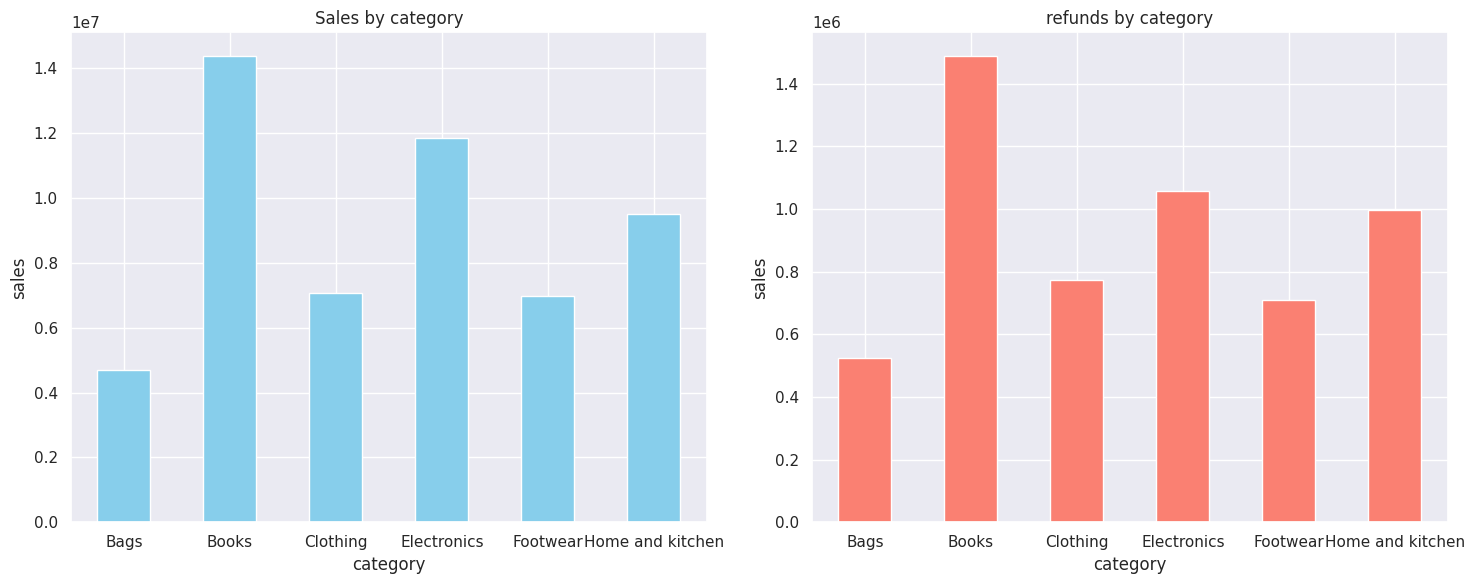

In [ ]:
# 양수값과 음수값을 가진 데이터프레임 분리
양수매출액_df = df[df['total_amt'] > 0]
음수매출액_df = df[df['total_amt'] < 0]
음수매출액_df['total_amt'] = 음수매출액_df['total_amt'].abs()  # 음수값에 절대값 적용

# 카테고리별 매출액 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 양수 매출액에 대한 그래프
양수매출액_카테고리별_매출액 = 양수매출액_df.groupby('prod_cat')['total_amt'].sum()
양수매출액_카테고리별_매출액.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sales by category')
axes[0].set_xlabel('category')
axes[0].set_ylabel('sales')
axes[0].tick_params(axis='x', rotation=0)

# 음수 매출액에 대한 그래프
음수매출액_카테고리별_매출액 = 음수매출액_df.groupby('prod_cat')['total_amt'].sum()
음수매출액_카테고리별_매출액.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('refunds by category')
axes[1].set_xlabel('category')
axes[1].set_ylabel('sales')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

비교적 가격이 높은 전자제품 카테고리가 환불이 적다.

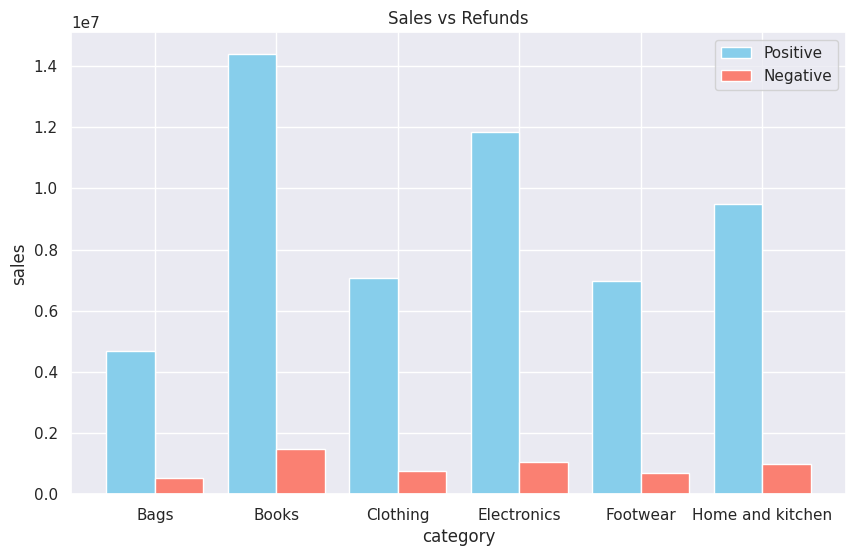

In [ ]:
# 양수값과 음수값을 가진 데이터프레임 분리
양수매출액_df = df[df['total_amt'] > 0].copy()
음수매출액_df = df[df['total_amt'] < 0].copy()
음수매출액_df['total_amt'] = 음수매출액_df['total_amt'].abs()  # 음수값에 절대값 적용

# 카테고리별 양수값과 음수값의 매출액 계산
양수매출액_카테고리별 = 양수매출액_df.groupby('prod_cat')['total_amt'].sum()
음수매출액_카테고리별 = 음수매출액_df.groupby('prod_cat')['total_amt'].sum()

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

카테고리 = 양수매출액_카테고리별.index
total_width, n = 0.8, 2
width = total_width / n
x = range(len(카테고리))

ax.bar(x, 양수매출액_카테고리별, width=width, label='Positive', color='skyblue')
ax.bar([i + width for i in x], 음수매출액_카테고리별, width=width, label='Negative', color='salmon')

ax.set_xlabel('category')
ax.set_ylabel('sales')
ax.set_title('Sales vs Refunds')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(카테고리)
ax.legend()

plt.show()

환불을 줄이기 위하여 구매확정 시 포인트 적립, 리뷰 작성 시 포인트 적립 등 이벤트를 고려해봐야 한다.

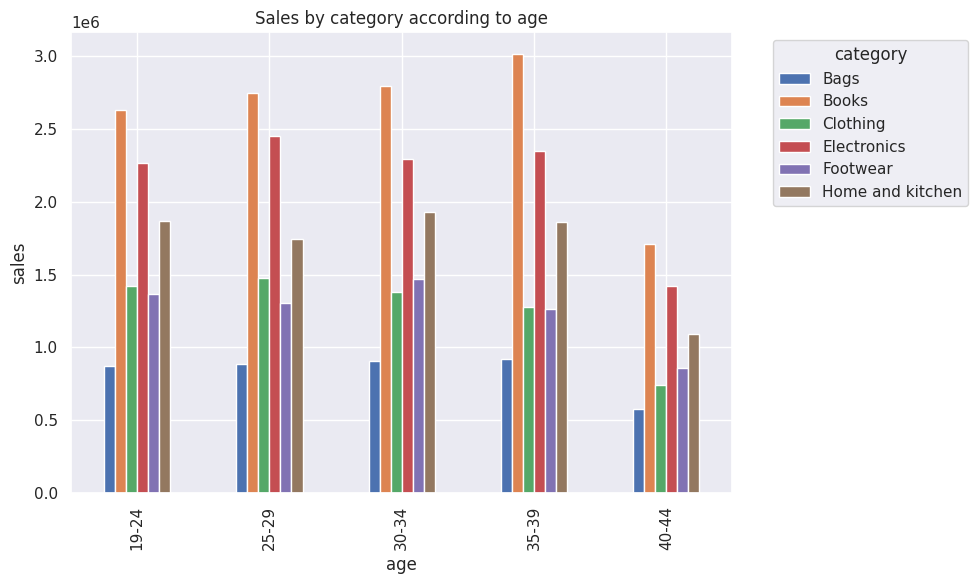

In [ ]:
bins = [19, 25, 30, 35, 40, 45]
labels = ['19-24', '25-29', '30-34', '35-39', '40-44']
df['age range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 카테고리별 매출액 계산
매출액_카테고리별 = df.pivot_table(index='age range', columns='prod_cat', values='total_amt', aggfunc='sum', fill_value=0)

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

매출액_카테고리별.plot(kind='bar', ax=ax)
ax.set_xlabel('age')
ax.set_ylabel('sales')
ax.set_title('Sales by category according to age')
ax.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

40-44세 구간 매출액이 가장 낮은 것을 알 수 있다.

나이대에 따라 타겟으로 잡을 카테고리가 다르다.
Books 카테고리를 제외하고, 나머지 카테고리에서 젊은 연령층의 소비가 많기 때문에 젊은 연령층을 주 고객층으로 하여 추천 상품 시스템을 추진하는 것이 좋을 것 같다.

In [ ]:
df['prod_subcat'].unique()

array(['Bath', 'Academic', 'Women', 'Mens', 'Tools', 'Fiction', 'DIY',
       'Kitchen', 'Non-Fiction', 'Kids', 'Mobiles', 'Audio and video',
       'Comics', 'Computers', 'Furnishing', 'Children',
       'Personal Appliances', 'Cameras'], dtype=object)

In [ ]:
# 대 카테고리별로 세부 카테고리 리스트 추출
대카테고리_리스트 = df['prod_cat'].unique()

# 대 카테고리별로 세부 카테고리 리스트 출력
for 대카테고리 in 대카테고리_리스트:
    세부카테고리_리스트 = df[df['prod_cat'] == 대카테고리]['prod_subcat'].unique()
    print(f"{대카테고리}: {세부카테고리_리스트}")

Home and kitchen: ['Bath' 'Tools' 'Kitchen' 'Furnishing']
Books: ['Academic' 'Fiction' 'DIY' 'Non-Fiction' 'Comics' 'Children']
Bags: ['Women' 'Mens']
Clothing: ['Mens' 'Kids' 'Women']
Footwear: ['Mens' 'Kids' 'Women']
Electronics: ['Mobiles' 'Audio and video' 'Computers' 'Personal Appliances' 'Cameras']


Home and kitchen: ['Bath' 'Tools' 'Kitchen' 'Furnishing']
Books: ['Academic' 'Fiction' 'DIY' 'Non-Fiction' 'Comics' 'Children']
Bags: ['Women' 'Mens']
Clothing: ['Mens' 'Kids' 'Women']
Footwear: ['Mens' 'Kids' 'Women']
Electronics: ['Mobiles' 'Audio and video' 'Computers' 'Personal Appliances' 'Cameras']


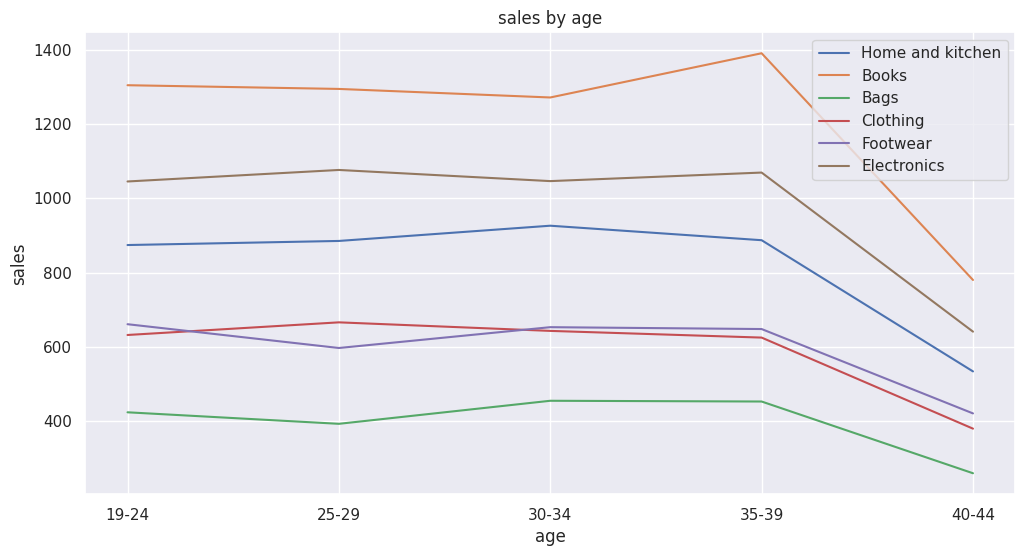

In [ ]:
# 대 카테고리별 세부 카테고리 리스트 생성
대대카테고리_리스트 = df['prod_cat'].unique()

# 대 카테고리별로 세부 카테고리 리스트 출력
for 대대카테고리 in 대대카테고리_리스트:
    세부카테고리_리스트 = df[df['prod_cat'] == 대대카테고리]['prod_subcat'].unique()
    print(f"{대대카테고리}: {세부카테고리_리스트}")

# 나이에 따른 카테고리별 매출액 계산
카테고리별_나이별_매출액 = df.groupby(['prod_cat', 'age range'])['age range'].count().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
for 대대카테고리 in 대대카테고리_리스트:
    plt.plot(카테고리별_나이별_매출액.loc[대대카테고리], label=대대카테고리)

plt.title('sales by age')
plt.xlabel('age')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
# 대 카테고리별 세부 카테고리 그룹화 및 합계 계산
그룹화된_데이터 = df.groupby(['prod_cat', 'prod_subcat', 'age range']).size().unstack(fill_value=0)
합계 = 그룹화된_데이터.sum(axis=1)

# 합계가 0이 아닌 세부 카테고리만 선택
그룹화된_데이터_필터링 = 그룹화된_데이터.loc[합계[합계 != 0].index]

# 그래프 그리기
fig, axs = plt.subplots(6, 1, figsize=(20, 40))

for i, (대카테고리, df_subset) in enumerate(그룹화된_데이터_필터링.groupby(level=0)):
    df_subset.plot(kind='bar', ax=axs[i], stacked=True)
    axs[i].set_title(f'{대카테고리} Sales by age group in categories')
    axs[i].set_xlabel('sub category')
    axs[i].set_ylabel('sales')

plt.tight_layout()
plt.show()

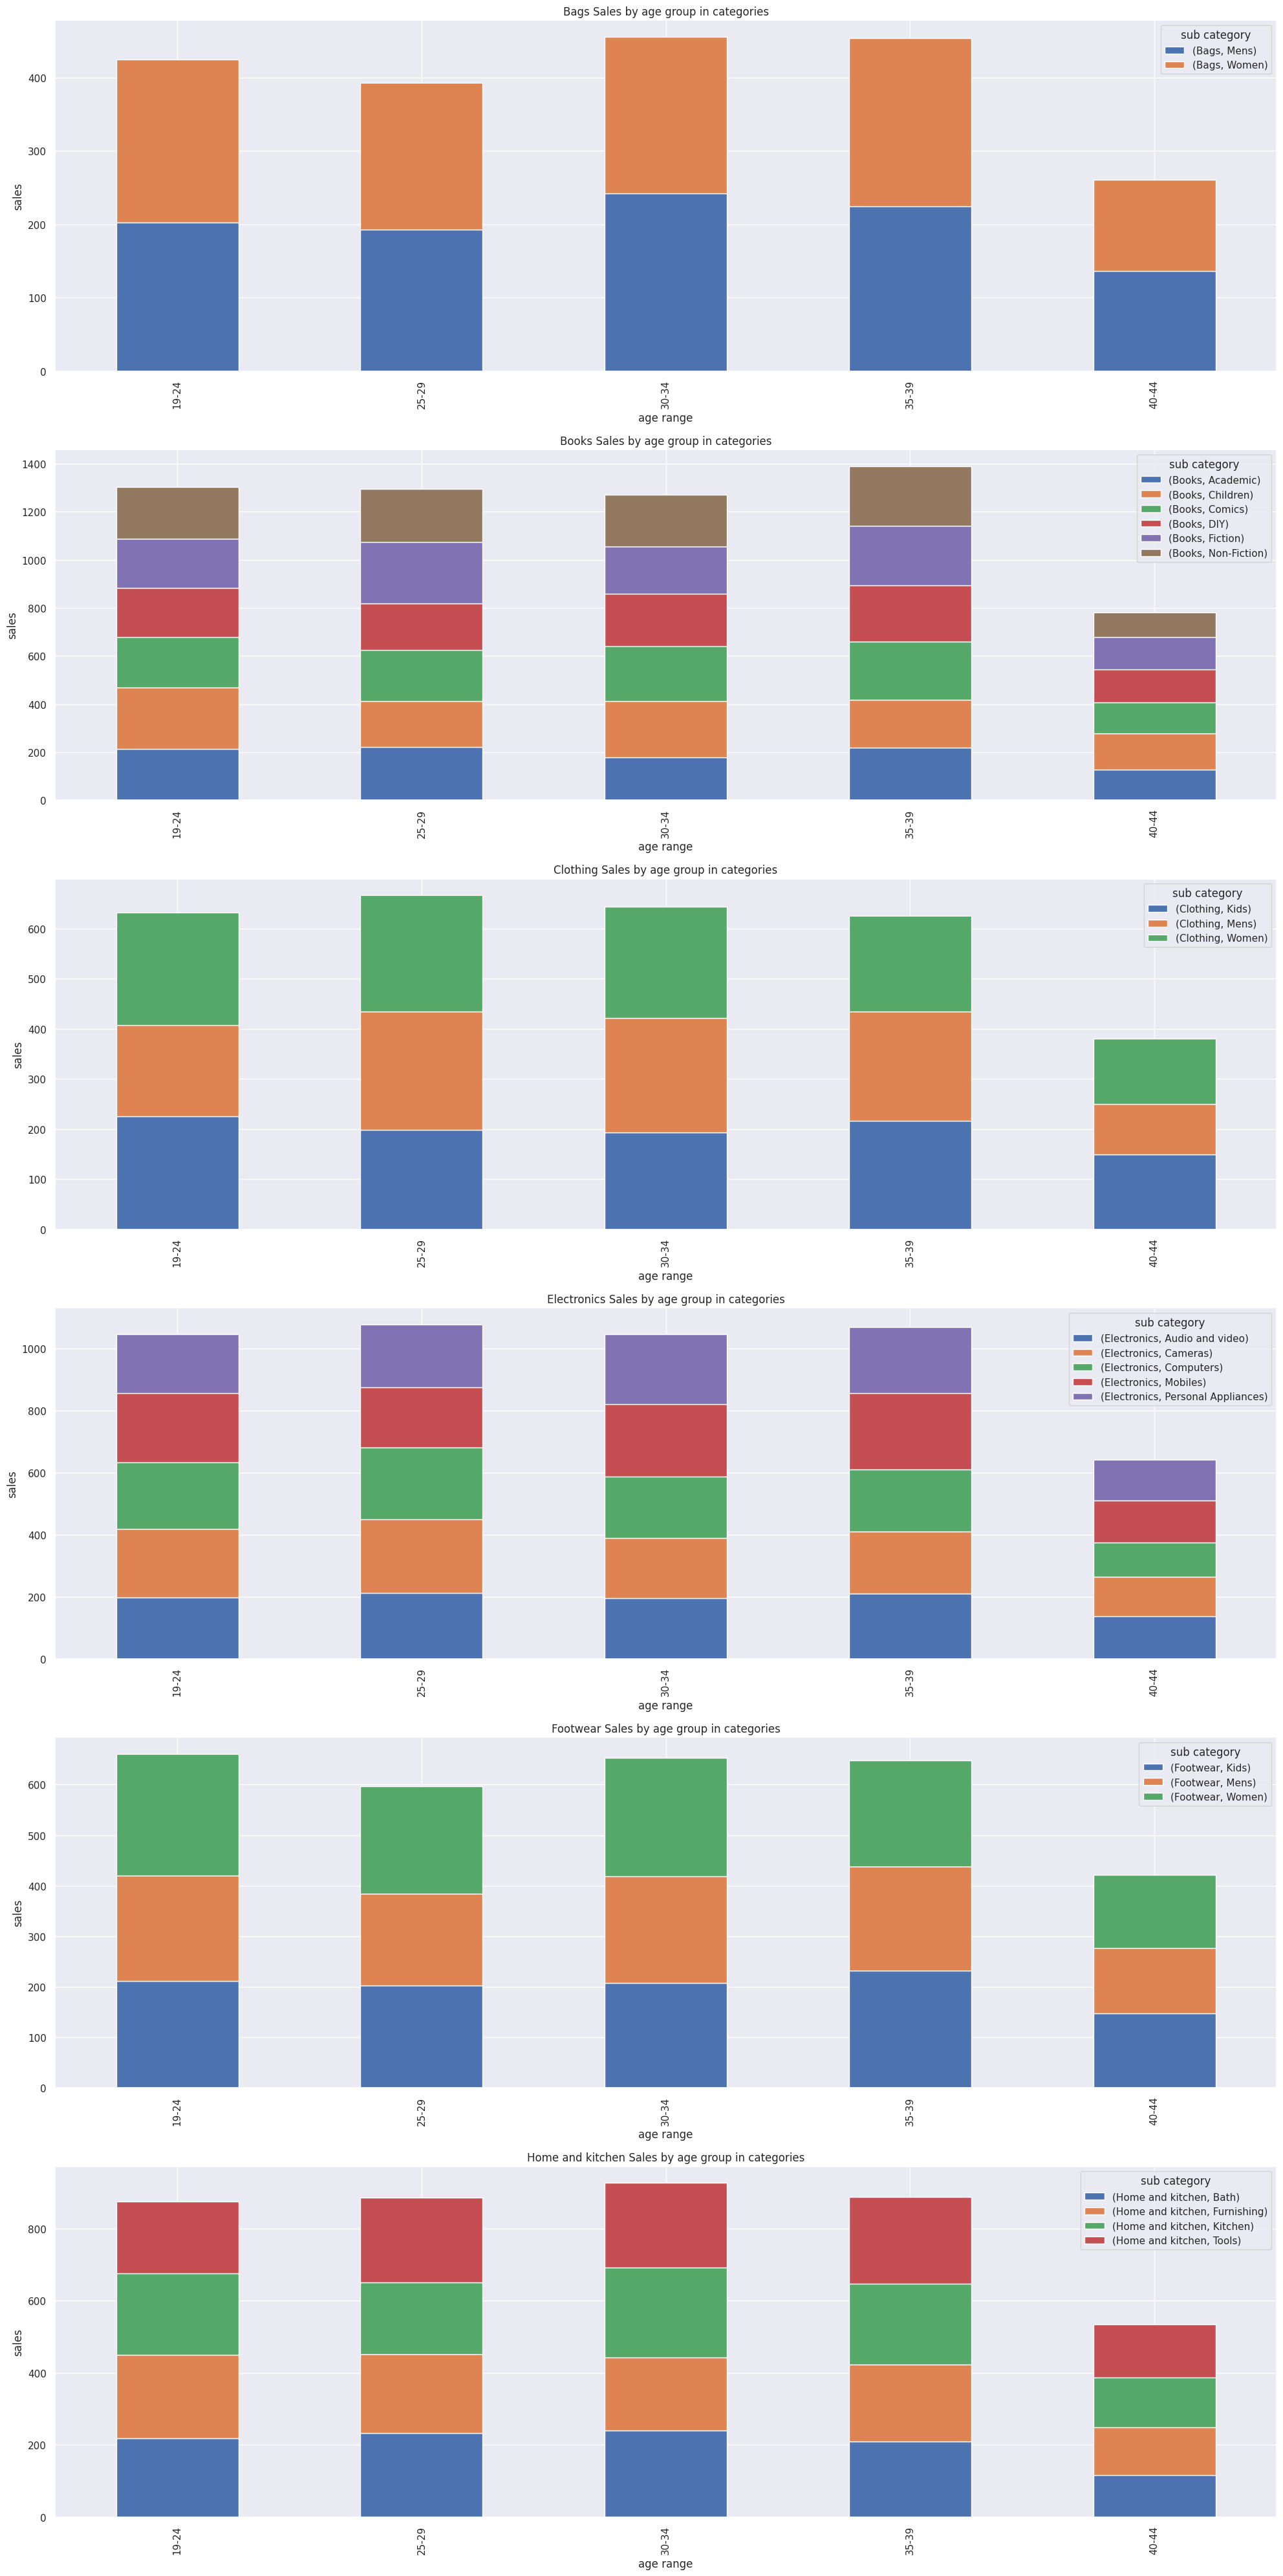

In [ ]:
# 그래프 그리기
fig, axs = plt.subplots(6, 1, figsize=(20, 40))

for i, (대카테고리, df_subset) in enumerate(그룹화된_데이터_필터링.groupby(level=0)):
    ax = axs[i]
    df_subset.T.plot(kind='bar', ax=ax, stacked=True)
    ax.set_title(f'{대카테고리} Sales by age group in categories')
    ax.set_xlabel('age range')
    ax.set_ylabel('sales')
    ax.legend(title='sub category')

plt.tight_layout()
plt.show()

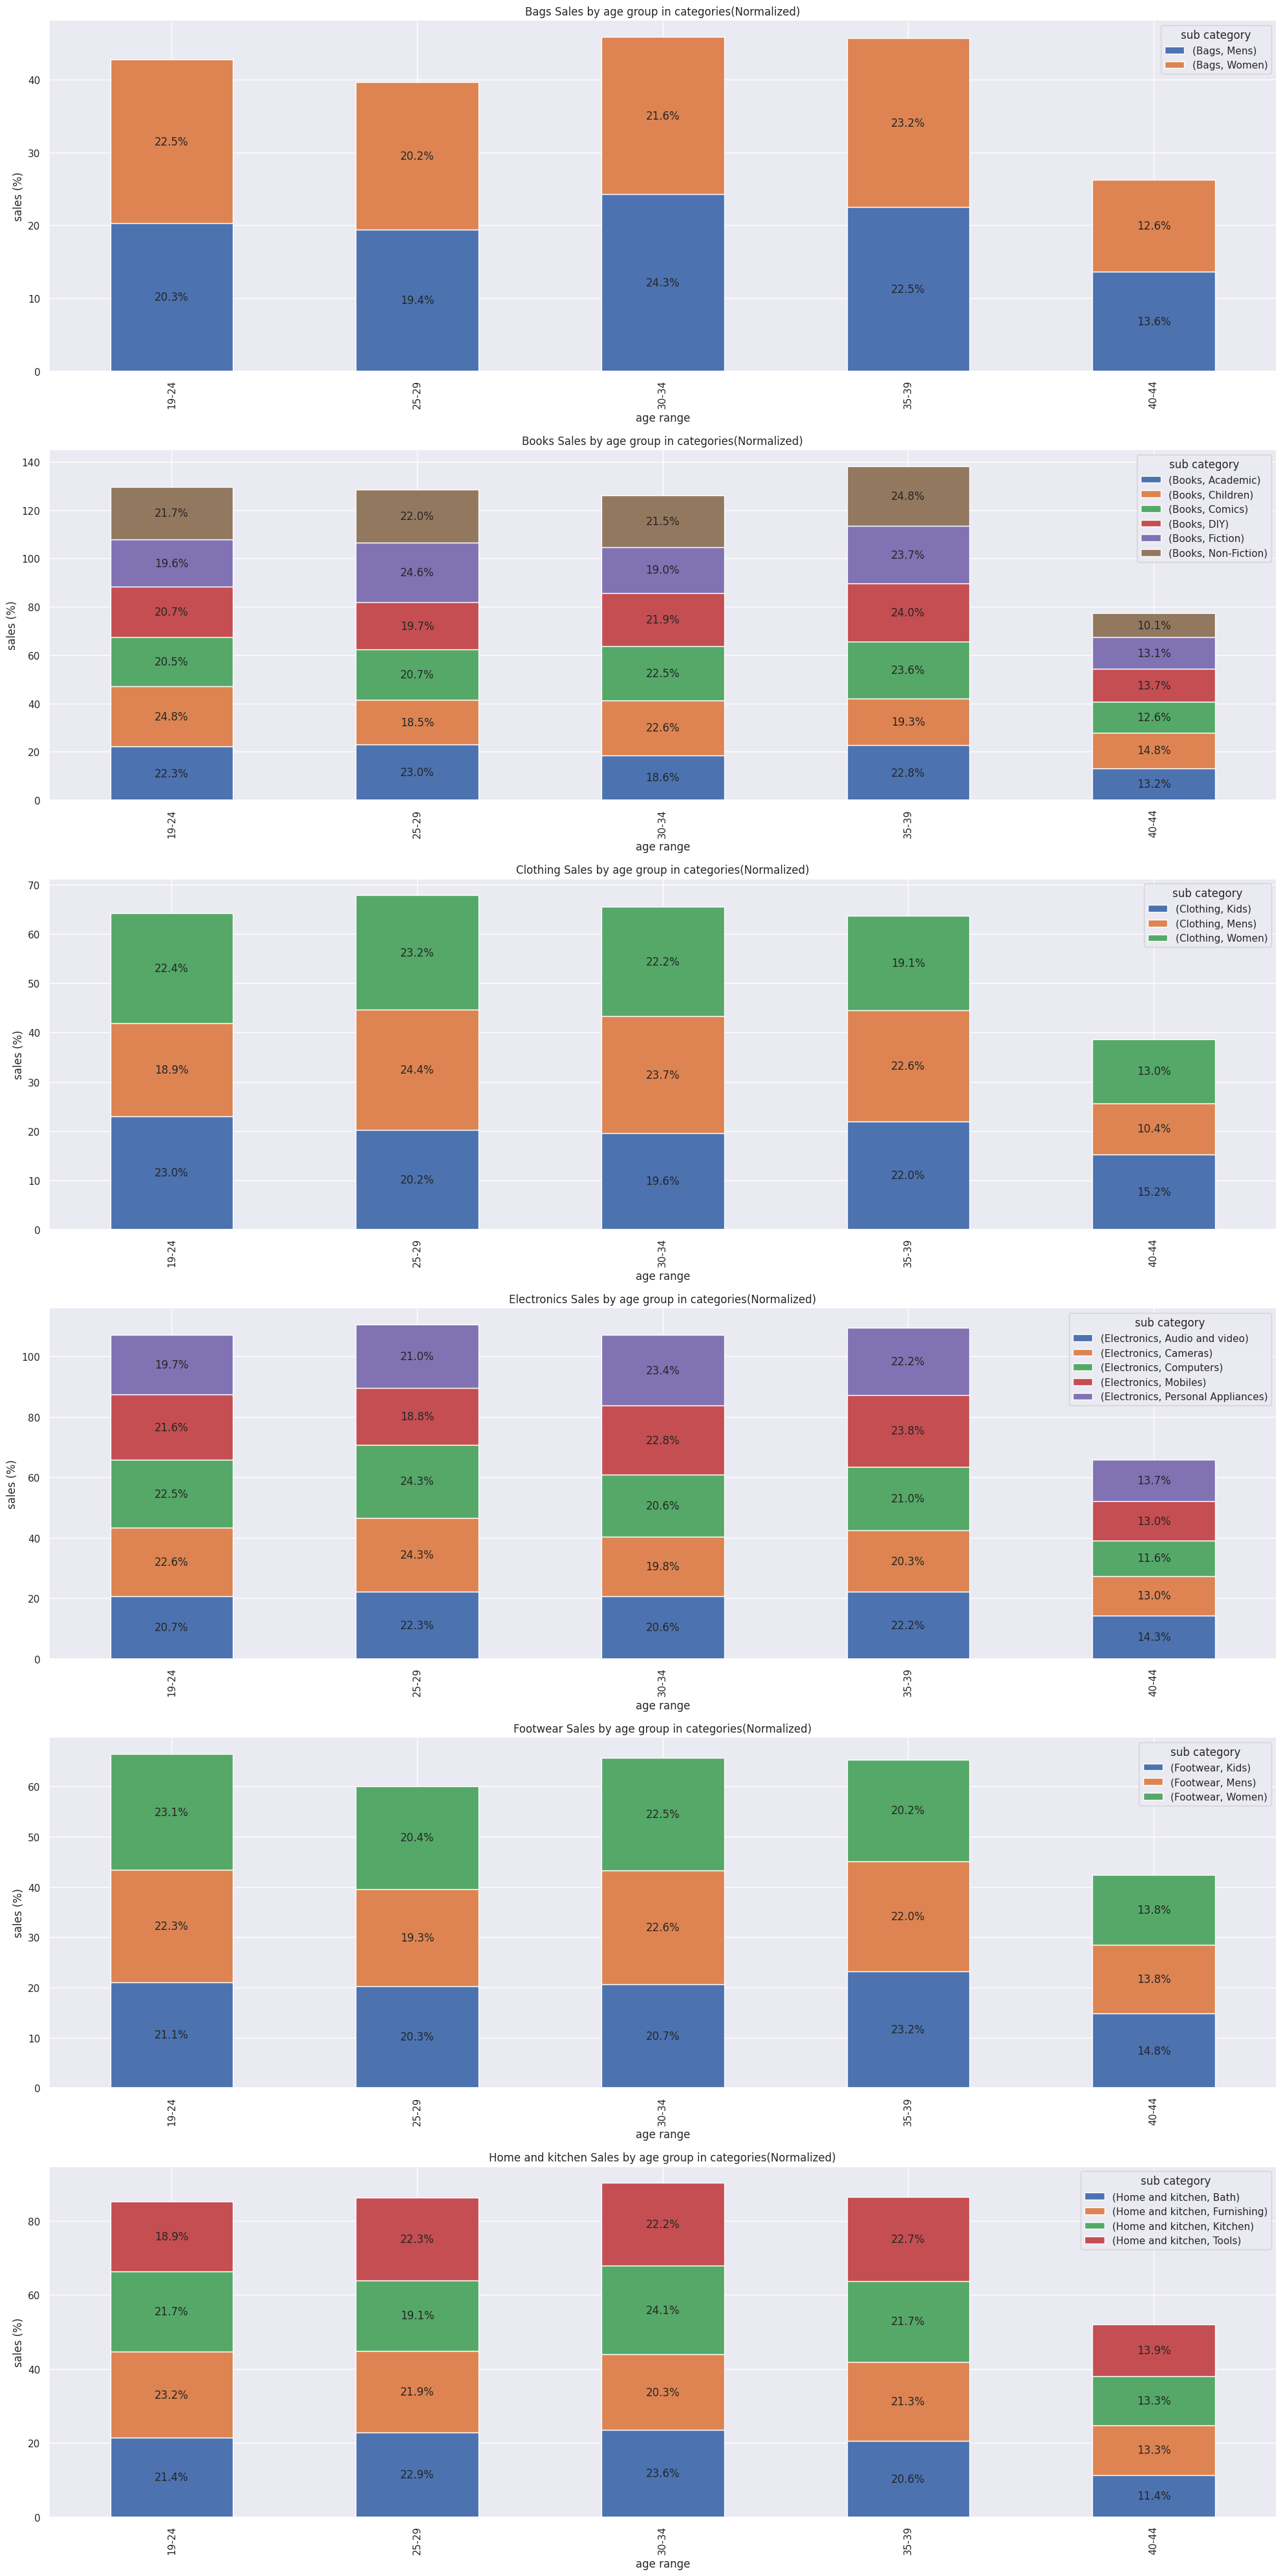

In [ ]:
# 그래프 그리기
fig, axs = plt.subplots(6, 1, figsize=(20, 40))

for i, (대카테고리, df_subset) in enumerate(그룹화된_데이터_필터링.groupby(level=0)):
    ax = axs[i]
    df_percent = df_subset.div(df_subset.sum(axis=1), axis=0) * 100
    df_percent.T.plot(kind='bar', ax=ax, stacked=True)
    ax.set_title(f'{대카테고리} Sales by age group in categories(Normalized)')
    ax.set_xlabel('age range')
    ax.set_ylabel('sales (%)')
    ax.legend(title='sub category')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

위 그래프는 서브카테고리 별 연령대의 매출액으로 카테고리 마다 매출액의 현황을 볼 수 있다.

# conclusion

```
결과
- 지역, 성별, 판매 채널 타입에 따라서 카테고리의 매출액은 차이가 크게 없다.
- 계절에 알맞은 Clothing 카테고리 제품을 중점적으로 세일을 하는 것이 중요하다.
- 다른 제품의 구매율도 함께 높일 수 있으므로 일정 금액 이상 시, 혜택을 부여하는 방안을 낼 수 있다.
- 비교적 가격이 높은 전자제품 카테고리가 환불이 적다.
- 환불을 줄이기 위하여 구매확정 시 포인트 적립, 리뷰 작성 시 포인트 적립 등 이벤트를 고려해봐야 한다.
- Books 카테고리를 제외하고, 나머지 카테고리에서 젊은 연령층의 소비가 많기 때문에
젊은 연령층을 주 고객층으로 하여 추천 상품 시스템을 추진하는 것이 좋을 것 같다.
```